<a href="https://colab.research.google.com/github/Luesierrape/Curso-IA-Udea/blob/main/LAB_05_02_MODEL_EVALUATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 05.02 - Model evaluation

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()


replicating local resources


In [58]:
from local.lib.rlxmoocapi import submit, session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L05.02", varname="student");

logging in as luesierrape@unal.edu.co... please wait
using course session ai4eng.v1::open
success!! you are logged in


## Task 1: Partition randomly `numpy` arrays

observe we can select specific rows and/or columns on a numpy array

In [6]:
import numpy as np

x = np.random.randint(100, size=(20,5))
x[:,0] = range(len(x))
x[0,:] = range(x.shape[1])
x

array([[ 0,  1,  2,  3,  4],
       [ 1, 47, 86, 93, 45],
       [ 2, 21, 70, 80, 16],
       [ 3, 38, 71, 67, 74],
       [ 4, 18, 96,  9, 24],
       [ 5, 27, 26, 91, 94],
       [ 6, 80,  3, 17, 65],
       [ 7, 21, 54, 93, 69],
       [ 8, 94, 37, 13,  0],
       [ 9, 39, 16, 26,  0],
       [10,  0,  5, 41, 41],
       [11, 25, 53, 59, 77],
       [12, 32,  4, 77, 41],
       [13, 91,  2, 63, 61],
       [14, 18, 13, 56, 94],
       [15, 28, 69,  5, 53],
       [16, 64, 59, 46, 82],
       [17, 29,  7, 15, 39],
       [18, 12, 23, 70, 58],
       [19,  6, 23, 37, 79]])

In [ ]:
ridxs = np.r_[2,4,5]
x[ridxs]

array([[ 2, 94, 88, 25, 34],
       [ 4,  3, 42,  6, 67],
       [ 5,  3,  1, 84, 39]])

In [ ]:
cidxs = np.r_[1,3]
x[:,cidxs]

array([[ 1,  3],
       [22, 85],
       [94, 25],
       [26, 21],
       [ 3,  6],
       [ 3, 84],
       [ 4, 98],
       [28,  3],
       [77, 74],
       [21, 72],
       [58, 35],
       [ 1, 95],
       [84, 60],
       [25, 84],
       [42, 97],
       [94, 49],
       [84, 67],
       [91, 48],
       [44, 71],
       [13, 42]])

In [ ]:
x[ridxs][:, cidxs]

array([[94, 25],
       [ 3,  6],
       [ 3, 84]])

and the dimensions of the array are accessible through `len` and `shape`

In [ ]:
len(x), x.shape

(20, (20, 5))

observe also how we can partition it

In [ ]:
x[:3]

array([[ 0,  1,  2,  3,  4],
       [ 1, 22, 43, 85, 11],
       [ 2, 94, 88, 25, 34]])

In [ ]:
x[3:]

array([[ 3, 26, 72, 21, 90],
       [ 4,  3, 42,  6, 67],
       [ 5,  3,  1, 84, 39],
       [ 6,  4, 85, 98, 33],
       [ 7, 28, 91,  3,  8],
       [ 8, 77, 13, 74, 98],
       [ 9, 21, 71, 72, 19],
       [10, 58, 37, 35, 61],
       [11,  1, 47, 95, 44],
       [12, 84, 42, 60, 25],
       [13, 25,  4, 84, 82],
       [14, 42, 45, 97, 35],
       [15, 94, 82, 49, 66],
       [16, 84, 77, 67, 94],
       [17, 91, 78, 48, 12],
       [18, 44, 45, 71, 86],
       [19, 13, 26, 42, 47]])

we can do the same thing with vectors

In [ ]:
v = np.arange(100,120)
v

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119])

In [ ]:
v[:5], v[5:]

(array([100, 101, 102, 103, 104]),
 array([105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119]))

finally, observe how we can create a random permutation of a specific vector

In [ ]:
np.random.permutation(v)

array([102, 117, 109, 113, 106, 111, 104, 115, 118, 119, 114, 101, 108,
       116, 103, 112, 100, 105, 107, 110])

or the first natural numbers

In [ ]:
p = np.random.permutation(20)
p

array([ 0,  7, 16,  9,  5,  8, 14, 17,  3,  1, 15, 12, 10, 13, 11, 19,  6,
       18,  2,  4])

how do you interpret this?

In [ ]:
v[p[5:]]

array([108, 114, 117, 103, 101, 115, 112, 110, 113, 111, 119, 106, 118,
       102, 104])

In [ ]:
x[p[:5]]

array([[ 0,  1,  2,  3,  4],
       [ 7, 28, 91,  3,  8],
       [16, 84, 77, 67, 94],
       [ 9, 21, 71, 72, 19],
       [ 5,  3,  1, 84, 39]])

### assignment

in this task you will have to complete the function  `split_data` below so that:

- it accepts two arguments `X` and `y`, either of which can be any numpy array (1D, 2D, etc.) of the **same** size $n$ (observe the  `assert` statement), and a `pct` 
- creates a random permutation of the natural number from $0$ to $n-1$
- partitions the permutations so that the first partition contains the first `n1_elements` $=$ `int(n * pct)` numbers, and the second partition the rest
- interpret the permutation partitions components as indexes to `X` and `y` so that they are partitioned into `X1`, `X2` and `y1`, `y2` respectively

note that **indexes to array** must be of type `int`. do the following to convert a float to int

In [4]:
a,b = 10,.3
c = a*b
print (c)
c = int(c)
print(c)

3.0
3


In [7]:
permutation = np.random.permutation(range(len(x)))
permutation

array([15,  8,  3, 11, 17, 13,  1,  2, 12,  6,  7,  0, 10,  9, 19,  4, 16,
       18,  5, 14])

In [8]:
def split_data(X, y, pct):
    
    assert len(X)==len(y), "X and y must have the same length"
    assert pct>0 and pct<1, "pct must be in the (0,1) iterval"
    
    permutation = np.random.permutation(range(len(X)))
    n1_elements = int(len(X)*pct)
    permutation_partition_1 = permutation[:n1_elements]
    permutation_partition_2 = permutation[n1_elements:]
    X1 = X[permutation_partition_1]
    X2 = X[permutation_partition_2]
    y1 = y[permutation_partition_1]
    y2 = y[permutation_partition_2]
    return X1, X2, y1, y2

check your solution manually with the following code

In [9]:
XX = np.random.randint(100, size=(20,8))
yy = np.arange(100,100+len(XX))
XX[:,0] = range(len(XX))
XX[0,:] = range(XX.shape[1])
print (XX)
print (yy)

[[ 0  1  2  3  4  5  6  7]
 [ 1 44 43 59 77 81 97 88]
 [ 2 54 44  0 64 33 22 62]
 [ 3 28 69 33 65 58  1 63]
 [ 4 46 12 39 34 13 73 39]
 [ 5 57 97 34 20 39 14 93]
 [ 6 68 64 86 45 46 45  4]
 [ 7 40  6  0 61 10 83 96]
 [ 8 43 34 17 68 65 23 45]
 [ 9 69 69 20  1 73 50 73]
 [10 30 57 14 19 39 92 11]
 [11 32 89 93 69 79 35  2]
 [12 65 44 69 73 83 38 40]
 [13  0 76 15 37 86 86 24]
 [14 38  0 97 52 54  5 27]
 [15 58 55 17 89 51 99 92]
 [16 20 16  1 30 72 61 25]
 [17 30 35 77 56 78 81 16]
 [18 44 64  1 11 68 91  3]
 [19 86 84 32  1 84 74 55]]
[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]


In [15]:
Xtr, Xts, ytr, yts = split_data(XX, yy, pct=.7)

In [11]:
# check partition ok
np.sum(XX), np.sum(Xtr) + np.sum(Xts), np.sum(yy), np.sum(ytr)+np.sum(yts)

(6644, 6644, 2190, 2190)

In [16]:
print (Xtr, "\n--")
print (Xts, "\n--")
print (ytr, "\n--")
print (yts, "\n--")
Xts.shape

[[16 20 16  1 30 72 61 25]
 [11 32 89 93 69 79 35  2]
 [ 8 43 34 17 68 65 23 45]
 [12 65 44 69 73 83 38 40]
 [19 86 84 32  1 84 74 55]
 [ 9 69 69 20  1 73 50 73]
 [17 30 35 77 56 78 81 16]
 [10 30 57 14 19 39 92 11]
 [ 7 40  6  0 61 10 83 96]
 [14 38  0 97 52 54  5 27]] 
--
[[ 0  1  2  3  4  5  6  7]
 [ 6 68 64 86 45 46 45  4]
 [ 1 44 43 59 77 81 97 88]
 [15 58 55 17 89 51 99 92]
 [ 5 57 97 34 20 39 14 93]
 [18 44 64  1 11 68 91  3]
 [ 2 54 44  0 64 33 22 62]
 [ 3 28 69 33 65 58  1 63]
 [ 4 46 12 39 34 13 73 39]
 [13  0 76 15 37 86 86 24]] 
--
[116 111 108 112 119 109 117 110 107 114] 
--
[100 106 101 115 105 118 102 103 104 113] 
--


(10, 8)

In [17]:
Xts

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 6, 68, 64, 86, 45, 46, 45,  4],
       [ 1, 44, 43, 59, 77, 81, 97, 88],
       [15, 58, 55, 17, 89, 51, 99, 92],
       [ 5, 57, 97, 34, 20, 39, 14, 93],
       [18, 44, 64,  1, 11, 68, 91,  3],
       [ 2, 54, 44,  0, 64, 33, 22, 62],
       [ 3, 28, 69, 33, 65, 58,  1, 63],
       [ 4, 46, 12, 39, 34, 13, 73, 39],
       [13,  0, 76, 15, 37, 86, 86, 24]])

**submit your code**

In [18]:
student.submit_task(globals(), task_id="task_01");


## Task 2: Fit a model and make predictions

observe how we create new data from synthetic datasets available in `sklearn`

In [31]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from local.lib import mlutils
%matplotlib inline

In [32]:
X, y = make_moons(200, noise=0.2)
X.shape, y.shape

((200, 2), (200,))

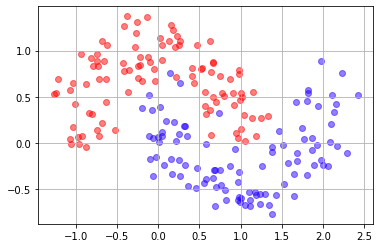

In [33]:
mlutils.plot_2Ddata(X,y); plt.grid();

observe also how we create an algorithm instance and fit a model

(0.4725, 0.5275)

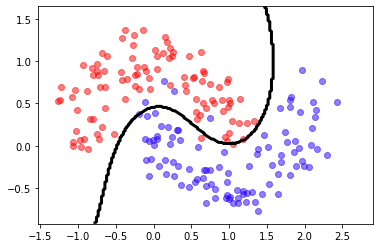

In [34]:
from sklearn.svm import SVC
estimator = SVC(gamma=1)
estimator.fit(X,y)
mlutils.plot_2Ddata_with_boundary(estimator.predict, X, y)

and how we make predictions

In [35]:
preds = estimator.predict(X)
print (preds.shape)
preds

(200,)


array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0])

in this task you have to complete the following function so that:

- it makes two non-random partitions of `X` and `y`. One containing the first half of the data and one containing the second part. If the number of elements of `X` is odd, then the second half will contain one more element than the first half.
- it fits the model with the first part of the data
- it makes predictions on the second half of the data
- returns the estimator fitted, and the predictions on the second half of the data.

In [42]:
def fit_and_predict(estimator, X, y):
    assert len(X)==len(y), "X and y must have the same length"
    
    X1 = X[:len(X)//2]
    X2 = X[len(X)//2:]
    y1 = y[:len(y)//2]
    y2 = y[len(y)//2:]

    estimator = estimator.fit(X1,y1)
    predictions = estimator.predict(X2)
    
    return estimator, predictions

check your code. your predictions should be similar to

    preds
    >> array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [43]:
X = np.array([[ 0.74799424, -0.5867667 ],
       [-0.64457753,  1.25127894],
       [ 0.53682593,  0.10931563],
       [-0.88825294, -0.06987509],
       [ 0.99612638, -0.52295157],
       [ 1.20586692,  0.01930477],
       [-0.19368482,  0.65121567],
       [ 0.1973759 ,  0.82250723],
       [ 0.94859234, -0.5457241 ],
       [ 1.87967948, -0.22740261],
       [ 0.58766146,  0.3982837 ],
       [ 0.27731571,  1.14369568],
       [-0.67421956,  0.12785382],
       [ 0.56957459,  1.05330376],
       [ 1.52435938, -0.29864338],
       [-0.15973608,  0.21790711],
       [ 1.59037406, -0.56875485],
       [ 0.43257507, -0.48900315],
       [ 1.09440413, -0.73789029],
       [-0.32940869,  0.74671384]])
y = np.array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])
X.shape, y.shape

((20, 2), (20,))

In [44]:
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression()
estimator, preds = fit_and_predict(estimator, X, y)
preds

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

**submit your code**

In [45]:
student.submit_task(globals(), task_id="task_02");


## Task 3: Select data with indices

Observe how we can create a vector or matrix of `True/False` (boolean) by applying a condition to any matrix or vector

In [46]:
import numpy as np
y = np.random.randint(10, size=15)
print (y)

[7 7 0 0 1 0 5 8 2 3 9 2 1 8 7]


In [49]:
y_less_than_5 = y<5
print (y_less_than_5)

[False False  True  True  True  True False False  True  True False  True
  True False False]


and how we can select elements of a vector using a boolean vector of the same length

In [50]:
y[y_less_than_5]

array([0, 0, 1, 0, 2, 3, 2, 1])

In [51]:
y[y<5]

array([0, 0, 1, 0, 2, 3, 2, 1])

python doesn't really care how you construct the vector of booleans to index any other vector or array

In [52]:
v = np.random.randint(20, size=15)
v

array([19, 10, 10, 19,  9, 13,  9, 14,  2,  6,  1, 11, 10,  9,  4])

In [53]:
v[y<5]

array([10, 19,  9, 13,  2,  6, 11, 10])

in this task you will complete the function `select_per_class` such that:

- receives an array of data `X` and a vector of labels `y`, of the same length
- the labels `y` are binary, they can only have values `0` or `1`
- makes two partitions of `X`, one corresponding to the places where y is 0, and another where y is 1
- returns the two partitions

For instance, for the following X and y

    X = np.array([[8, 8, 5, 2, 0, 0],
                  [4, 4, 8, 1, 3, 7],
                  [4, 5, 3, 6, 9, 6],
                  [0, 3, 5, 3, 5, 3],
                  [0, 7, 2, 7, 1, 7],
                  [5, 7, 7, 1, 8, 5],
                  [2, 5, 7, 3, 8, 0],
                  [7, 2, 5, 9, 8, 7],
                  [1, 6, 6, 1, 6, 0],
                  [0, 7, 6, 5, 3, 4]])

    y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

your function must return the following two matrices:

    [[8 8 5 2 0 0]
     [4 4 8 1 3 7]
     [4 5 3 6 9 6]
     [0 3 5 3 5 3]
     [2 5 7 3 8 0]
     [7 2 5 9 8 7]]
     
    [[0 7 2 7 1 7]
     [5 7 7 1 8 5]
     [1 6 6 1 6 0]
     [0 7 6 5 3 4]]


In [54]:
def select_per_class(X, y):
    X1 = X[y==0]
    X2 = X[y==1]
    return X1, X2

check manually your code

In [55]:
X = np.array([[8, 8, 5, 2, 0, 0],
              [4, 4, 8, 1, 3, 7],
              [4, 5, 3, 6, 9, 6],
              [0, 3, 5, 3, 5, 3],
              [0, 7, 2, 7, 1, 7],
              [5, 7, 7, 1, 8, 5],
              [2, 5, 7, 3, 8, 0],
              [7, 2, 5, 9, 8, 7],
              [1, 6, 6, 1, 6, 0],
              [0, 7, 6, 5, 3, 4]])

y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [56]:
a,b = select_per_class(X, y)
print (a)
print (b)

[[8 8 5 2 0 0]
 [4 4 8 1 3 7]
 [4 5 3 6 9 6]
 [0 3 5 3 5 3]
 [2 5 7 3 8 0]
 [7 2 5 9 8 7]]
[[0 7 2 7 1 7]
 [5 7 7 1 8 5]
 [1 6 6 1 6 0]
 [0 7 6 5 3 4]]


**submit your code**

In [59]:
student.submit_task(globals(), task_id="task_03");


## Task 4: Measure accuracy

complete the following function such that:

- it receives to binary vectors (composed of 0's and 1's) of the same length
- returns the percentage of elements that are the same in both vectors

recall that

- if `a` and `b` are vectors of the same length a==b   returns a vector of booleans in which positions in True signal that elements in those position are the same
- if `k` is a vector of booleans, `sum(k)` returns the number of `True` elements.


for the following two vectors you should get 0.375

    a = np.array([1,0,0,0,1,1,0,0])
    b = np.array([1,1,1,1,0,1,0,1])
    accuracy(a, b)
    >>> 0.375


In [70]:
def accuracy(y_true, y_pred):
    k = y_true == y_pred
    result = k.mean()
    return result

In [71]:
a = np.array([1,0,0,0,1,1,0,0])
b = np.array([1,1,1,1,0,1,0,1])
accuracy(a,b)

0.375

**submit your code**

In [72]:
student.submit_task(globals(), task_id="task_04");


## Task 5: Random split, fit and predict

complete the following function so that:

- fits the estimator with a random sample of size `train_pct` of the data `X` and binary labels `y`. You can use the `split_data` function developed previously
- makes predictions on the test part of the data
- measures accuracy of those predictions. you may use the function created previously
- returns the estimator fitted, the test part of `X` and `y`, and the accuracy measured


the execution below should return something with the following structure (the actual numbers will change)


    (LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                        intercept_scaling=1, l1_ratio=None, max_iter=100,
                        multi_class='warn', n_jobs=None, penalty='l2',
                        random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                        warm_start=False), array([[-0.76329684,  0.2572069 ],
            [ 1.02356829,  0.37629873],
            [ 0.32099415,  0.82244488],
            [ 1.08858315, -0.61299904],
            [ 0.58470767,  0.58510559],
            [ 1.60827644, -0.15477173],
            [ 1.53121784,  0.78121504],
            [-0.42734156,  0.87585237],
            [-0.36368682,  0.72152586],
            [ 1.05312619,  0.19835526]]), array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0]), 0.6)

In [76]:

def split_fit_predict(estimator, X, y, train_pct):
    
    def split_data(X, y, pct):
      assert len(X)==len(y), "X and y must have the same length"
      assert pct>0 and pct<1, "pct must be in the (0,1) iterval"
    
      permutation = np.random.permutation(range(len(X)))
      n1_elements = int(len(X)*pct)
      permutation_partition_1 = permutation[:n1_elements]
      permutation_partition_2 = permutation[n1_elements:]
      X1 = X[permutation_partition_1]
      X2 = X[permutation_partition_2]
      y1 = y[permutation_partition_1]
      y2 = y[permutation_partition_2]
      return X1, X2, y1, y2

    
    def accuracy(y_true, y_pred):
      k = y_true == y_pred
      result = k.mean()
      return result

    Xtr, Xts, ytr, yts = split_data(X,y,train_pct)
    estimator = estimator.fit(Xtr,ytr)
    preds_ts = estimator.predict(Xts) 
    return estimator, Xts, yts, accuracy(yts, preds_ts)
        
        

In [77]:
from sklearn.linear_model import LogisticRegression

X, y = make_moons(100, noise=0.2)
estimator = LogisticRegression(solver="lbfgs")
split_fit_predict(estimator, X, y, train_pct=0.9)


(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False), array([[-0.14954179,  0.67350676],
        [-0.23651769,  0.09970753],
        [-0.09253945,  1.12036508],
        [-0.10336594,  0.87630892],
        [-0.67560142,  0.80828841],
        [ 2.19973531,  0.1977077 ],
        [ 1.41355305, -0.44017883],
        [-0.92055444, -0.09006182],
        [ 1.97705548, -0.25946746],
        [ 1.91960564, -0.10854506]]), array([0, 1, 0, 0, 0, 1, 1, 0, 1, 1]), 0.9)

**submit your code**

In [78]:
student.submit_task(globals(), task_id="task_05");
